In [56]:
from sklearn.datasets import load_digits
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras.layers import Input, Dense, Reshape
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.models import Sequential


from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


import random

data = load_digits()
X = data.data
y = data.target


In [3]:
X.shape

(1797, 64)

In [5]:
y.shape

(1797,)

In [29]:
X[0][58]

6.0

In [32]:
random.choice(y)

9

In [43]:
test = np.resize(X[0],(8,8,1))

In [44]:
test

array([[[ 0.],
        [ 0.],
        [ 5.],
        [13.],
        [ 9.],
        [ 1.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [13.],
        [15.],
        [10.],
        [15.],
        [ 5.],
        [ 0.]],

       [[ 0.],
        [ 3.],
        [15.],
        [ 2.],
        [ 0.],
        [11.],
        [ 8.],
        [ 0.]],

       [[ 0.],
        [ 4.],
        [12.],
        [ 0.],
        [ 0.],
        [ 8.],
        [ 8.],
        [ 0.]],

       [[ 0.],
        [ 5.],
        [ 8.],
        [ 0.],
        [ 0.],
        [ 9.],
        [ 8.],
        [ 0.]],

       [[ 0.],
        [ 4.],
        [11.],
        [ 0.],
        [ 1.],
        [12.],
        [ 7.],
        [ 0.]],

       [[ 0.],
        [ 2.],
        [14.],
        [ 5.],
        [10.],
        [12.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 6.],
        [13.],
        [10.],
        [ 0.],
        [ 0.],
        [ 0.]]])

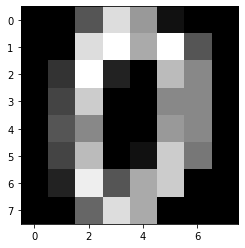

In [45]:
plt.imshow(test,cmap = 'gray')

In [37]:
y[0]

0

In [40]:
# oki czyli mamy w X 1797 próbek cyfr 8x8, a co to tak na prawdę jest siedzi w jednowymiarowym y

In [47]:
x = np.empty(shape=(1797,8,8,1),dtype=float)
for i in range(0,1797):
    x[i] = np.resize(X[i],(8,8,1))

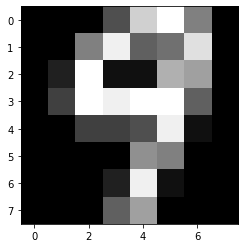

In [58]:
plt.imshow(random.choice(x),cmap = 'gray')

In [65]:
def build_model():
    model = Sequential()
    model.add(Input(shape=(8,8,1),name='img'))
    
    model.add(Dense(64, activation="relu"))
    model.add(Dense(64, activation="relu"))
    
    model.add(Reshape((8,8,64)))
    

    return model

In [66]:
opt = Adam(learning_rate=0.001,decay =1e-6)

In [69]:
model = build_model()

In [70]:
model.compile(opt,loss="mse", metrics = ['accuracy'])

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8, 8, 64)          128       
_________________________________________________________________
dense_7 (Dense)              (None, 8, 8, 64)          4160      
_________________________________________________________________
reshape_3 (Reshape)          (None, 8, 8, 64)          0         
Total params: 4,288
Trainable params: 4,288
Non-trainable params: 0
_________________________________________________________________


In [78]:
# podział na zbiór testowy i treningowy mógłby się okazać pomocny

In [79]:
len(x)

1797

In [80]:
train_size = int(len(x)*.7)

In [81]:
train_size

1257

In [88]:
test_size = int(len(x)*.3) +1

In [89]:
test_size

540

In [90]:
x_train = x[0:train_size]
y_train = y[0:train_size]
x_test = x[-test_size:]
y_test = y[-test_size:]

In [93]:
history = model.fit(x_train,y_train,batch_size=1,epochs=500, validation_data=(x_test,y_test),verbose=2)


Epoch 1/500
1257/1257 - 4s - loss: 16.9553 - accuracy: 0.0141 - val_loss: 12.6777 - val_accuracy: 0.0045
Epoch 2/500
1257/1257 - 3s - loss: 12.2371 - accuracy: 0.0117 - val_loss: 12.0252 - val_accuracy: 0.0243
Epoch 3/500
1257/1257 - 4s - loss: 12.0788 - accuracy: 0.0211 - val_loss: 11.9994 - val_accuracy: 0.0132
Epoch 4/500
1257/1257 - 3s - loss: 12.0318 - accuracy: 0.0226 - val_loss: 12.0031 - val_accuracy: 0.0201
Epoch 5/500
1257/1257 - 3s - loss: 12.0807 - accuracy: 0.0232 - val_loss: 11.9981 - val_accuracy: 0.0374
Epoch 6/500
1257/1257 - 3s - loss: 12.0343 - accuracy: 0.0231 - val_loss: 12.0053 - val_accuracy: 0.0290
Epoch 7/500
1257/1257 - 3s - loss: 12.0730 - accuracy: 0.0232 - val_loss: 11.9947 - val_accuracy: 0.0251
Epoch 8/500
1257/1257 - 3s - loss: 12.0594 - accuracy: 0.0259 - val_loss: 12.0990 - val_accuracy: 0.0234
Epoch 9/500
1257/1257 - 3s - loss: 12.0795 - accuracy: 0.0235 - val_loss: 12.0061 - val_accuracy: 0.0177
Epoch 10/500
1257/1257 - 3s - loss: 12.0364 - accuracy:

Epoch 78/500
1257/1257 - 3s - loss: 10.1708 - accuracy: 0.0029 - val_loss: 10.0922 - val_accuracy: 0.0000e+00
Epoch 79/500
1257/1257 - 3s - loss: 10.1635 - accuracy: 0.0018 - val_loss: 10.1868 - val_accuracy: 0.0000e+00
Epoch 80/500
1257/1257 - 3s - loss: 10.1559 - accuracy: 0.0095 - val_loss: 10.0833 - val_accuracy: 0.0000e+00
Epoch 81/500
1257/1257 - 3s - loss: 10.1640 - accuracy: 0.0041 - val_loss: 10.1123 - val_accuracy: 0.0055
Epoch 82/500
1257/1257 - 3s - loss: 10.1367 - accuracy: 0.0075 - val_loss: 10.1067 - val_accuracy: 0.0000e+00
Epoch 83/500
1257/1257 - 3s - loss: 10.1932 - accuracy: 0.0105 - val_loss: 10.0828 - val_accuracy: 0.0476
Epoch 84/500
1257/1257 - 3s - loss: 10.1628 - accuracy: 0.0219 - val_loss: 10.0847 - val_accuracy: 0.0066
Epoch 85/500
1257/1257 - 3s - loss: 10.1502 - accuracy: 0.0138 - val_loss: 10.0841 - val_accuracy: 0.0066
Epoch 86/500
1257/1257 - 3s - loss: 10.1361 - accuracy: 0.0187 - val_loss: 10.1108 - val_accuracy: 0.0000e+00
Epoch 87/500
1257/1257 - 3

Epoch 154/500
1257/1257 - 3s - loss: 9.8258 - accuracy: 0.0014 - val_loss: 9.8209 - val_accuracy: 0.0000e+00
Epoch 155/500
1257/1257 - 3s - loss: 9.8080 - accuracy: 0.0019 - val_loss: 9.7641 - val_accuracy: 0.0000e+00
Epoch 156/500
1257/1257 - 3s - loss: 9.8487 - accuracy: 0.0049 - val_loss: 9.7848 - val_accuracy: 0.0146
Epoch 157/500
1257/1257 - 3s - loss: 9.8425 - accuracy: 0.0033 - val_loss: 9.7657 - val_accuracy: 0.0061
Epoch 158/500
1257/1257 - 4s - loss: 9.8491 - accuracy: 5.4694e-04 - val_loss: 9.7717 - val_accuracy: 0.0000e+00
Epoch 159/500
1257/1257 - 3s - loss: 9.8223 - accuracy: 0.0018 - val_loss: 9.7656 - val_accuracy: 0.0000e+00
Epoch 160/500
1257/1257 - 4s - loss: 9.7737 - accuracy: 0.0061 - val_loss: 9.9445 - val_accuracy: 0.0000e+00
Epoch 161/500
1257/1257 - 4s - loss: 9.8710 - accuracy: 0.0019 - val_loss: 9.7855 - val_accuracy: 0.0087
Epoch 162/500
1257/1257 - 4s - loss: 9.8562 - accuracy: 0.0014 - val_loss: 9.7633 - val_accuracy: 0.0000e+00
Epoch 163/500
1257/1257 - 4

Epoch 231/500
1257/1257 - 3s - loss: 9.8249 - accuracy: 0.0450 - val_loss: 9.8071 - val_accuracy: 0.0541
Epoch 232/500
1257/1257 - 3s - loss: 9.8449 - accuracy: 0.0460 - val_loss: 9.7708 - val_accuracy: 0.0662
Epoch 233/500
1257/1257 - 3s - loss: 9.8303 - accuracy: 0.0343 - val_loss: 9.7746 - val_accuracy: 0.0599
Epoch 234/500
1257/1257 - 3s - loss: 9.8116 - accuracy: 0.0337 - val_loss: 9.7734 - val_accuracy: 0.0094
Epoch 235/500
1257/1257 - 3s - loss: 9.8347 - accuracy: 0.0257 - val_loss: 9.8193 - val_accuracy: 0.0000e+00
Epoch 236/500
1257/1257 - 3s - loss: 9.8354 - accuracy: 0.0135 - val_loss: 9.7795 - val_accuracy: 0.0044
Epoch 237/500
1257/1257 - 3s - loss: 9.8209 - accuracy: 0.0074 - val_loss: 9.8077 - val_accuracy: 0.0000e+00
Epoch 238/500
1257/1257 - 4s - loss: 9.8136 - accuracy: 0.0075 - val_loss: 9.7702 - val_accuracy: 0.0000e+00
Epoch 239/500
1257/1257 - 3s - loss: 9.8009 - accuracy: 0.0367 - val_loss: 9.7784 - val_accuracy: 0.0662
Epoch 240/500
1257/1257 - 3s - loss: 9.8399

Epoch 308/500
1257/1257 - 3s - loss: 9.8210 - accuracy: 0.0077 - val_loss: 9.7635 - val_accuracy: 0.0438
Epoch 309/500
1257/1257 - 3s - loss: 9.8206 - accuracy: 0.0063 - val_loss: 9.8173 - val_accuracy: 0.0000e+00
Epoch 310/500
1257/1257 - 3s - loss: 9.8196 - accuracy: 0.0049 - val_loss: 9.7719 - val_accuracy: 0.0024
Epoch 311/500
1257/1257 - 3s - loss: 9.8210 - accuracy: 0.0045 - val_loss: 9.8036 - val_accuracy: 0.0000e+00
Epoch 312/500
1257/1257 - 3s - loss: 9.8251 - accuracy: 0.0048 - val_loss: 9.7626 - val_accuracy: 0.0068
Epoch 313/500
1257/1257 - 3s - loss: 9.8267 - accuracy: 0.0039 - val_loss: 9.7614 - val_accuracy: 0.0000e+00
Epoch 314/500
1257/1257 - 3s - loss: 9.8170 - accuracy: 0.0113 - val_loss: 9.7851 - val_accuracy: 0.0051
Epoch 315/500
1257/1257 - 3s - loss: 9.8084 - accuracy: 0.0169 - val_loss: 9.7613 - val_accuracy: 0.0438
Epoch 316/500
1257/1257 - 3s - loss: 9.8161 - accuracy: 0.0103 - val_loss: 9.8023 - val_accuracy: 0.0031
Epoch 317/500
1257/1257 - 3s - loss: 9.8375

1257/1257 - 3s - loss: 9.8135 - accuracy: 0.0034 - val_loss: 9.7638 - val_accuracy: 0.0000e+00
Epoch 386/500
1257/1257 - 3s - loss: 9.8201 - accuracy: 0.0099 - val_loss: 9.7716 - val_accuracy: 0.0000e+00
Epoch 387/500
1257/1257 - 3s - loss: 9.7910 - accuracy: 0.0230 - val_loss: 9.7623 - val_accuracy: 0.0000e+00
Epoch 388/500
1257/1257 - 3s - loss: 9.8172 - accuracy: 0.0065 - val_loss: 9.7640 - val_accuracy: 0.0079
Epoch 389/500
1257/1257 - 3s - loss: 9.8140 - accuracy: 0.0089 - val_loss: 9.7875 - val_accuracy: 0.0115
Epoch 390/500
1257/1257 - 3s - loss: 9.8277 - accuracy: 0.0104 - val_loss: 9.7613 - val_accuracy: 0.0202
Epoch 391/500
1257/1257 - 3s - loss: 9.8294 - accuracy: 0.0110 - val_loss: 9.7708 - val_accuracy: 0.0000e+00
Epoch 392/500
1257/1257 - 3s - loss: 9.8321 - accuracy: 0.0068 - val_loss: 9.7613 - val_accuracy: 0.0000e+00
Epoch 393/500
1257/1257 - 3s - loss: 9.8309 - accuracy: 0.0072 - val_loss: 9.7633 - val_accuracy: 0.0000e+00
Epoch 394/500
1257/1257 - 3s - loss: 9.8208 -

Epoch 463/500
1257/1257 - 3s - loss: 9.8066 - accuracy: 0.0129 - val_loss: 9.7660 - val_accuracy: 0.0000e+00
Epoch 464/500
1257/1257 - 3s - loss: 9.8237 - accuracy: 0.0099 - val_loss: 9.7611 - val_accuracy: 0.0501
Epoch 465/500
1257/1257 - 3s - loss: 9.8160 - accuracy: 0.0267 - val_loss: 9.7642 - val_accuracy: 0.0238
Epoch 466/500
1257/1257 - 3s - loss: 9.8136 - accuracy: 0.0185 - val_loss: 9.7636 - val_accuracy: 0.0000e+00
Epoch 467/500
1257/1257 - 3s - loss: 9.8122 - accuracy: 0.0158 - val_loss: 9.7877 - val_accuracy: 0.0262
Epoch 468/500
1257/1257 - 3s - loss: 9.8277 - accuracy: 0.0092 - val_loss: 9.7688 - val_accuracy: 0.0151
Epoch 469/500
1257/1257 - 3s - loss: 9.8205 - accuracy: 0.0119 - val_loss: 9.7637 - val_accuracy: 0.0000e+00
Epoch 470/500
1257/1257 - 3s - loss: 9.8191 - accuracy: 0.0112 - val_loss: 9.8009 - val_accuracy: 0.0293
Epoch 471/500
1257/1257 - 3s - loss: 9.8194 - accuracy: 0.0148 - val_loss: 9.7637 - val_accuracy: 0.0316
Epoch 472/500
1257/1257 - 3s - loss: 9.8136

In [98]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    acc = history.history['accuracy']
    val_accuracy = history.history['loss']
    
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs,loss,label ='training_loss')
    plt.plot(epochs, val_loss,label = 'val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, acc,label = 'training_accuracy')
    plt.plot(epochs, val_loss,label = 'val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()


In [109]:
def plot_metrics(history):
    floss_train = history.history['loss']
    floss_test = history.history['val_loss']
    acc_train = history.history['accuracy']
    acc_test = history.history['val_accuracy']
    fig,ax = plt.subplots(1,2,figsize=(20,10))
    
    epochs = range(len(history.history['loss']))
    
    ax[0].plot(epochs,floss_train,label = 'floss_train')
    ax[0].plot(epochs,floss_test,label = 'floss_test')
    ax[0].set_title('Funkcje strat')
    ax[0].legend()
    ax[1].set_title('Dokladnosci')
    ax[1].plot(epochs,acc_train,label = 'acc_train')
    ax[1].plot(epochs, acc_test,label = 'acc_test')
    ax[1].legend()

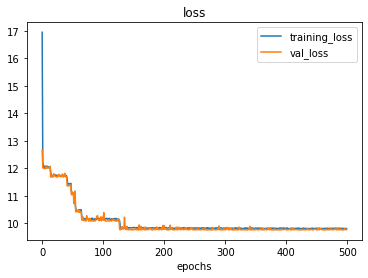

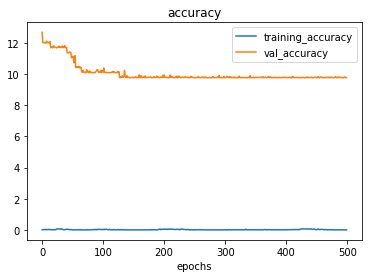

In [96]:
plot_loss_curves(history)

In [97]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

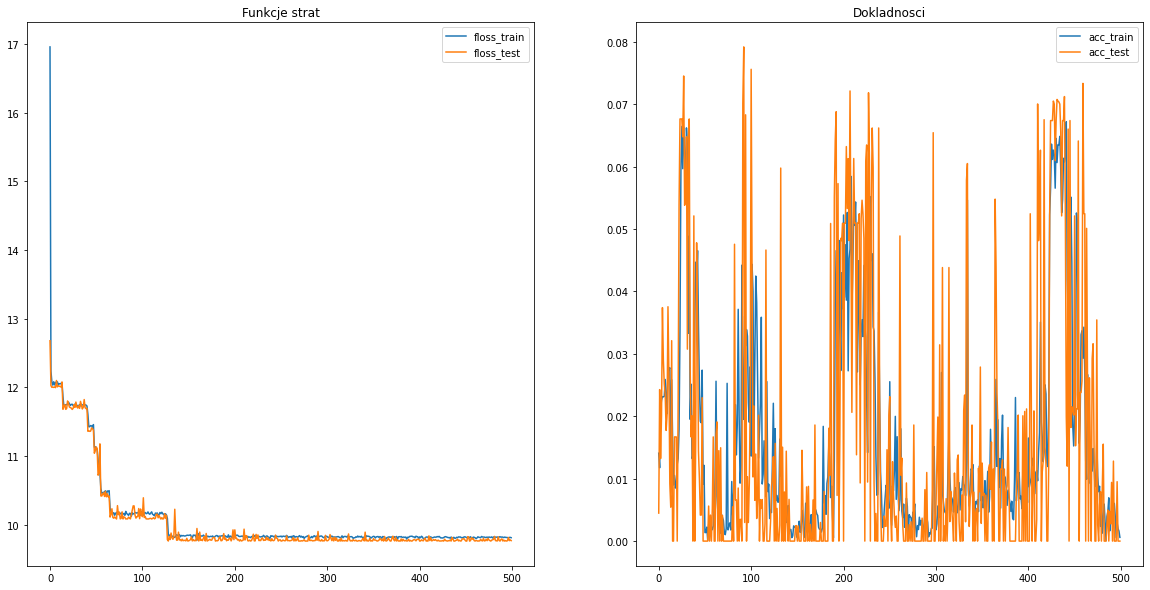

In [110]:
plot_metrics(history)